In [1]:
import numpy as np
from sklearn.covariance import MinCovDet
import sklearn
# Generate a toy dataset with outliers
np.random.seed(0)
X = np.vstack([np.random.normal(size=(20, 3)), 
               np.random.normal(loc=4, size=(5, 3)), # loc is "mean"
               np.random.normal(loc=-4, size=(5, 3))])


In [2]:
X.shape

(30, 3)

In [3]:
# Fit Minimum Covariance Determinant estimator
mcd = MinCovDet().fit(X)
#mcd = sklearn.covariance.EllipticEnvelope().fit(X)

In [4]:
# Compute robust covariance matrix and Mahalanobis distances
robust_cov = mcd.covariance_
print(robust_cov)

[[1.57091676 0.32565534 0.37815904]
 [0.32565534 1.20128206 0.40846456]
 [0.37815904 0.40846456 1.18345299]]


In [5]:
mdist = mcd.mahalanobis(X)

In [9]:
mdist.shape

(30,)

In [10]:
X

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982],
       [ 0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852],
       [-0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656],
       [ 0.3869025 , -0.51080514, -1.18063218],
       [-0.02818223,  0.42833187,  0.06651722],
       [ 0.3024719 , -0.63432209, -0.36274117],
       [ 3.32753955,  3.64044684,  3.186

In [7]:
mdist

array([ 2.59712295,  6.68823269,  0.59363948,  3.13221752,  0.72382759,
        1.75573724,  4.65674354,  1.05124113,  6.56927074,  4.26903508,
        0.44795515,  3.93670167,  1.74911997,  1.50233688,  6.75941835,
        4.21323599,  1.98483341,  0.8806979 ,  0.2760524 ,  0.55078603,
       17.62840686, 20.35684782, 19.85906588, 28.64065142, 27.82905674,
       32.26771027, 29.14849571, 26.88724079,  8.66179429, 27.99985106])

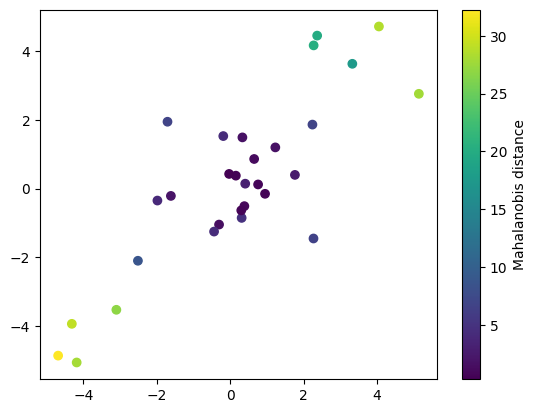

In [8]:
# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=mdist, cmap='viridis')
plt.colorbar(label='Mahalanobis distance')
plt.show()